### Graph

Chain rule

$\begin{aligned} \frac{\partial y}{\partial w} &=\frac{\partial y}{\partial a} \frac{\partial a}{\partial w}+\frac{\partial y}{\partial b} \frac{\partial b}{\partial w} \ &=b  1+a  1 \ &=b+a \ &=(w+1)+(x+w) \ &=2  w+x+1 \ &=2  1+2+1=5\end{aligned}$

In [2]:
import torch
w = torch.tensor([1.], requires_grad=True)
x = torch.tensor([2.], requires_grad=True)
# y=(x+w)*(w+1)
a = torch.add(w,x)
b = torch.add(w,1)
y = torch.mul(a,b)
# differentiate
y.backward()
print(w.grad)

tensor([5.])


In [4]:
print("is_leaf:\n", w.is_leaf, x.is_leaf, a.is_leaf, b.is_leaf, y.is_leaf)
print("gradient:\n", w.grad, x.grad, a.grad, b.grad, y.grad)

is_leaf:
 True True False False False
gradient:
 tensor([5.]) tensor([2.]) None None None


<ipython-input-4-f43cacbedf8f>:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:486.)
  print("gradient:\n", w.grad, x.grad, a.grad, b.grad, y.grad)


### autograd

In [7]:
# auto gradient descent
# torch.autograd.backward(tensors, grad_tensors=None, retain_graph=None, create_graph=False, grad_variables=None)
# tensors: tensor to be derivated
# grad_tensors = give weight if more than 1 tensor
w = torch.tensor([1.], requires_grad=True)
x = torch.tensor([2.], requires_grad=True)
# y=(x+w)*(w+1)
a = torch.add(w,x)
b = torch.add(w,1)
y = torch.mul(a,b)
y.backward(retain_graph=True)
print(w.grad)
y.backward()
print(w.grad)

tensor([5.])
tensor([10.])


In [8]:
# grad_tensors
w = torch.tensor([1.], requires_grad=True)
x = torch.tensor([2.], requires_grad=True)
# y=(x+w)*(w+1)
a = torch.add(w,x)
b = torch.add(w,1)
y_0 = torch.mul(a,b)
y_1 = torch.add(a,b)
loss = torch.cat([y_0,y_1],dim=0) # [y_0,y_1]
grad_tensors = torch.tensor([1.,2.])
loss.backward(gradient=grad_tensors)
print(w.grad)

tensor([9.])


In [9]:
# n rank derivation
# torch.autograd.grad(outputs, inputs, grad_outputs=None, retain_graph=None, create_graph=False, only_inputs=True, allow_unused=False)
# outputs: tensor to be derivated like loss
# input: tensor need gradient
x = torch.tensor([3.],requires_grad=True)
y = torch.pow(x,2)
grad_1 = torch.autograd.grad(y,x,create_graph=True)
print(grad_1)
grad_2 = torch.autograd.grad(grad_1[0],x)
print(grad_2)

(tensor([6.], grad_fn=<MulBackward0>),)
(tensor([2.]),)


In [11]:
# clear the gradient for update the parameter
# w.grad.zero_()
for i in range(4):
    a = torch.add(w, x)
    b = torch.add(w, 1)
    y = torch.mul(a, b)
    y.backward()
    print(w.grad)
    w.grad.zero_()

tensor([6.])
tensor([6.])
tensor([6.])
tensor([6.])


In [12]:
# inplace
# the memory address of origin data and varied data is same
print("not inplace operation")
a = torch.ones((1, ))
print(id(a), a)
# not inplace 
a = a + torch.ones((1, ))
print(id(a), a)

print("inplace operation")
a = torch.ones((1, ))
print(id(a), a)
# inplace 
a += torch.ones((1, ))
print(id(a), a)

not inplace operation
139730015479632 tensor([1.])
139729458835232 tensor([2.])
inplace operation
139729895285488 tensor([1.])
139729895285488 tensor([2.])


### Logistic regression

In [23]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
# step (1/5) data processing
sample_nums = 100
mean_value = 1.7
bias = 1
n_data = torch.ones(sample_nums, 2)
## generate features
x0 = torch.normal(mean_value * n_data, 1) + bias
x1 = torch.normal(-mean_value * n_data, 1) + bias
## generate labels
y0 = torch.zeros(sample_nums)
y1 = torch.ones(sample_nums)
## 
train_x = torch.cat((x0,x1),0)
train_y = torch.cat((y0,y1),0)

# step (2/5) select model
class LogisticRegression(nn.Module):
  def __init__(self):
    super(LogisticRegression, self).__init__()
    self.features = nn.Linear(2, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self,x):
    x = self.features(x)
    x = self.sigmoid(x)
    return x

lr_net = LogisticRegression()
# step (3/5) loss function
criterion = nn.BCELoss()

# step (4/5) optimizer
lr = 0.01
optimizer = torch.optim.SGD(lr_net.parameters(), lr=lr, momentum=0.9)

# step (5/5) training
epochs=1000
for epoch in range(epochs):
  # forward propagation
  y_pred = lr_net(train_x)
  # compute loss
  loss = criterion(y_pred.squeeze(), train_y)
  # backpropagation
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()

  if epoch %100 ==0:
    mask = y_pred.ge(0.5).float().squeeze()
    correct = (mask == train_y).sum()
    acc = correct.item()/train_y.size(0)
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")


Epoch [1/1000], Loss: 1.1993
Epoch [101/1000], Loss: 0.1142
Epoch [201/1000], Loss: 0.0777
Epoch [301/1000], Loss: 0.0620
Epoch [401/1000], Loss: 0.0535
Epoch [501/1000], Loss: 0.0480
Epoch [601/1000], Loss: 0.0441
Epoch [701/1000], Loss: 0.0412
Epoch [801/1000], Loss: 0.0389
Epoch [901/1000], Loss: 0.0371


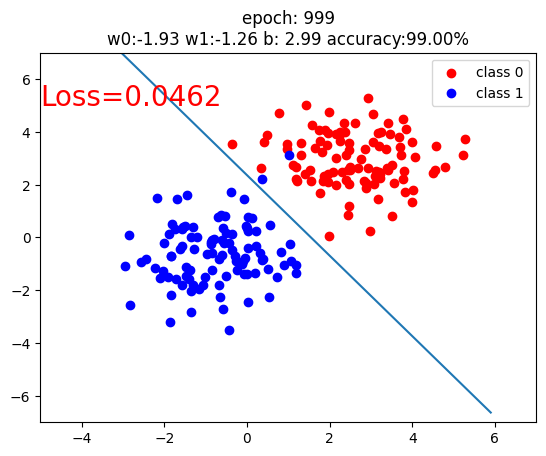

In [21]:
plt.scatter(x0.data.numpy()[:, 0], x0.data.numpy()[:, 1], c='r', label='class 0')
plt.scatter(x1.data.numpy()[:, 0], x1.data.numpy()[:, 1], c='b', label='class 1')

w0, w1 = lr_net.features.weight[0]
w0, w1 = float(w0.item()), float(w1.item())
plot_b = float(lr_net.features.bias[0].item())
plot_x = np.arange(-6, 6, 0.1)
plot_y = (-w0 * plot_x - plot_b) / w1

plt.xlim(-5, 7)
plt.ylim(-7, 7)
plt.plot(plot_x, plot_y)

plt.text(-5, 5, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color': 'red'})
plt.title("epoch: {}\nw0:{:.2f} w1:{:.2f} b: {:.2f} accuracy:{:.2%}".format(epoch, w0, w1, plot_b, acc))
plt.legend()
# plt.savefig(str(iteration / 20)+".png")
plt.show()